# PART 1. Data-pre processing

<strong> Step #0 - Start the program by importing the libraries </strong>

In [1]:
# Import modules and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime

from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard

<strong>Step #1 - Reading the Data </strong> 

In [2]:
# Importing Training Set
dataset_train = pd.read_csv('https://raw.githubusercontent.com/zalven/covid-19-prediction-2021/main/covid_prediction_data/philippines_covid_cases.csv')




# Select features (columns) to be involved intro training and predictions


predict_value = 'new_cases'       # Legend that we want to predict 


# Legends that support the legend we want to predict
cols = [
    'total_cases',
] 



n_future = 60                     # Number of days we want top predict into the future
n_past = 90                       # Number of past days we want to use to predict the future
n_starting_date = '2020-01-30'
n_starting_date = '2020-01-30'



# Generate columns 
cols.insert(0, predict_value)  

# Extract dates (will be used in visualization)
datelist_train = list(dataset_train['date'])
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]

print('Training set shape == {}'.format(dataset_train.shape))
print('All timestamps == {}'.format(len(datelist_train)))
print('Featured selected: {}'.format(cols))

Training set shape == (499, 60)
All timestamps == 499
Featured selected: ['new_cases', 'total_cases']


In [3]:
dataset_train.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,PHL,Asia,Philippines,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,370.437,7.07,7.8,40.8,78.463,1.0,71.23,0.718,NaN
1,PHL,Asia,Philippines,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,370.437,7.07,7.8,40.8,78.463,1.0,71.23,0.718,2.83
2,PHL,Asia,Philippines,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,370.437,7.07,7.8,40.8,78.463,1.0,71.23,0.718,NaN
3,PHL,Asia,Philippines,2020-02-02,2.0,1.0,NaN,1.0,1.0,NaN,...,NaN,370.437,7.07,7.8,40.8,78.463,1.0,71.23,0.718,NaN
4,PHL,Asia,Philippines,2020-02-03,2.0,0.0,NaN,1.0,0.0,NaN,...,NaN,370.437,7.07,7.8,40.8,78.463,1.0,71.23,0.718,NaN


In [4]:
dataset_train.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
494,PHL,Asia,Philippines,2021-06-07,1276004.0,6526.0,6529.000,21969.0,71.0,143.286,...,NaN,370.437,7.07,7.8,40.8,78.463,1.0,71.23,0.718,NaN
495,PHL,Asia,Philippines,2021-06-08,1280773.0,4769.0,6472.286,22064.0,95.0,150.286,...,NaN,370.437,7.07,7.8,40.8,78.463,1.0,71.23,0.718,NaN
496,PHL,Asia,Philippines,2021-06-09,1286217.0,5444.0,6500.143,22190.0,126.0,147.429,...,NaN,370.437,7.07,7.8,40.8,78.463,1.0,71.23,0.718,NaN
497,PHL,Asia,Philippines,2021-06-10,1293687.0,7470.0,6541.143,22312.0,122.0,136.429,...,NaN,370.437,7.07,7.8,40.8,78.463,1.0,71.23,0.718,NaN
498,PHL,Asia,Philippines,2021-06-11,1300349.0,6662.0,6430.286,22507.0,195.0,138.571,...,NaN,370.437,7.07,7.8,40.8,78.463,1.0,71.23,0.718,NaN


<strong>Step #2 - Data pre processing </strong> 

In [5]:

dataset_train = dataset_train[cols].astype(str)
for i in cols:
    for j in range(0, len(dataset_train)):
        dataset_train[i][j] = dataset_train[i][j].replace(',', '')

dataset_train = dataset_train.astype(float)

# Using multiple features (predictors)
training_set = dataset_train.to_numpy()

print('Shape of training set == {}.'.format(training_set.shape))
training_set

Shape of training set == (499, 2).


array([[1.000000e+00, 1.000000e+00],
       [0.000000e+00, 1.000000e+00],
       [0.000000e+00, 1.000000e+00],
       [1.000000e+00, 2.000000e+00],
       [0.000000e+00, 2.000000e+00],
       [0.000000e+00, 2.000000e+00],
       [0.000000e+00, 2.000000e+00],
       [0.000000e+00, 2.000000e+00],
       [1.000000e+00, 3.000000e+00],
       [0.000000e+00, 3.000000e+00],
       [0.000000e+00, 3.000000e+00],
       [0.000000e+00, 3.000000e+00],
       [0.000000e+00, 3.000000e+00],
       [0.000000e+00, 3.000000e+00],
       [0.000000e+00, 3.000000e+00],
       [0.000000e+00, 3.000000e+00],
       [0.000000e+00, 3.000000e+00],
       [0.000000e+00, 3.000000e+00],
       [0.000000e+00, 3.000000e+00],
       [0.000000e+00, 3.000000e+00],
       [0.000000e+00, 3.000000e+00],
       [0.000000e+00, 3.000000e+00],
       [0.000000e+00, 3.000000e+00],
       [0.000000e+00, 3.000000e+00],
       [0.000000e+00, 3.000000e+00],
       [0.000000e+00, 3.000000e+00],
       [0.000000e+00, 3.000000e+00],
 

In [6]:

# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)

sc_predict = StandardScaler()
sc_predict.fit_transform(training_set[:, 0:1])

array([[-9.32054145e-01],
       [-9.32411951e-01],
       [-9.32411951e-01],
       [-9.32054145e-01],
       [-9.32411951e-01],
       [-9.32411951e-01],
       [-9.32411951e-01],
       [-9.32411951e-01],
       [-9.32054145e-01],
       [-9.32411951e-01],
       [-9.32411951e-01],
       [-9.32411951e-01],
       [-9.32411951e-01],
       [-9.32411951e-01],
       [-9.32411951e-01],
       [-9.32411951e-01],
       [-9.32411951e-01],
       [-9.32411951e-01],
       [-9.32411951e-01],
       [-9.32411951e-01],
       [-9.32411951e-01],
       [-9.32411951e-01],
       [-9.32411951e-01],
       [-9.32411951e-01],
       [-9.32411951e-01],
       [-9.32411951e-01],
       [-9.32411951e-01],
       [-9.32411951e-01],
       [-9.32411951e-01],
       [-9.32411951e-01],
       [-9.32411951e-01],
       [-9.32411951e-01],
       [-9.32411951e-01],
       [-9.32411951e-01],
       [-9.32411951e-01],
       [-9.32411951e-01],
       [-9.31696338e-01],
       [-9.32054145e-01],
       [-9.3

In [7]:
# Creating a data structure with 90 timestamps and 1 output
X_train = []
y_train = []

for i in range(n_past, len(training_set_scaled) - n_future +1):
    X_train.append(training_set_scaled[i - n_past:i, 0:dataset_train.shape[1] - 1])
    y_train.append(training_set_scaled[i + n_future - 1:i + n_future, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

X_train shape == (350, 90, 1).
y_train shape == (350, 1).


# PART 2. Create a model. Training

<strong> Step #3. Building the LSTM based Neural Network </strong>

In [8]:
# Import Libraries and packages from Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam

In [9]:
# Initializing the Neural Network based on LSTM
model = Sequential()

# Adding 1st LSTM layer
model.add(LSTM(units=64, return_sequences=True, input_shape=(n_past, dataset_train.shape[1]-1)))

# Adding 2nd LSTM layer
model.add(LSTM(units=10, return_sequences=False))

# Adding Dropout
model.add(Dropout(0.25))

# Output layer
model.add(Dense(units=1, activation='linear'))

# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error')

<strong> Step #4. Start training </strong> 

In [10]:
%%time
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')

history = model.fit(X_train, y_train, shuffle=True, epochs=30, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=256)

Epoch 1/30
2/2 [==============================] - 51s 8s/step - loss: 0.4420 - val_loss: 4.3184

Epoch 00001: val_loss improved from inf to 4.31839, saving model to weights.h5
Epoch 2/30
2/2 [==============================] - 0s 172ms/step - loss: 0.4994 - val_loss: 4.4535

Epoch 00002: val_loss did not improve from 4.31839
Epoch 3/30
2/2 [==============================] - 1s 237ms/step - loss: 0.4726 - val_loss: 4.2739

Epoch 00003: val_loss improved from 4.31839 to 4.27387, saving model to weights.h5
Epoch 4/30
2/2 [==============================] - 1s 235ms/step - loss: 0.4585 - val_loss: 4.4087

Epoch 00004: val_loss did not improve from 4.27387
Epoch 5/30
2/2 [==============================] - 1s 267ms/step - loss: 0.4402 - val_loss: 4.5859

Epoch 00005: val_loss did not improve from 4.27387
Epoch 6/30
2/2 [==============================] - 1s 210ms/step - loss: 0.4328 - val_loss: 4.3150

Epoch 00006: val_loss did not improve from 4.27387
Epoch 7/30
2/2 [==========================

# PART 3. Make future predictions

In [11]:
# Generate list of sequence of days for predictions
datelist_future = pd.date_range(datelist_train[-1], periods=n_future, freq='1d').tolist()

'''
Remeber, we have datelist_train from begining.
'''

# Convert Pandas Timestamp to Datetime object (for transformation) --> FUTURE
datelist_future_ = []
for this_timestamp in datelist_future:
    datelist_future_.append(this_timestamp.date())

<strong> Step #5. Make predictions for future dates </strong>

In [12]:

# Perform predictions
predictions_future = model.predict(X_train[-n_future:])

predictions_train = model.predict(X_train[n_past:])

In [13]:
# Inverse the predictions to original measurements

# ---> Special function: convert <datetime.date> to <Timestamp>
def datetime_to_timestamp(x):
    '''
        x : a given datetime value (datetime.date)
    '''
    return datetime.strptime(x.strftime('%Y%m%d'), '%Y%m%d')


y_pred_future = sc_predict.inverse_transform(predictions_future)
y_pred_train = sc_predict.inverse_transform(predictions_train)

PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['new_cases']).set_index(pd.Series(datelist_future))
PREDICTION_TRAIN = pd.DataFrame(y_pred_train, columns=['new_cases']).set_index(pd.Series(datelist_train[2 * n_past + n_future -1:]))

# Convert <datetime.date> to <Timestamp> for PREDCITION_TRAIN
PREDICTION_TRAIN.index = PREDICTION_TRAIN.index.to_series().apply(datetime_to_timestamp)

PREDICTION_TRAIN.head(3)


,new_cases
2020-09-25,2570.443604
2020-09-26,2540.897461
2020-09-27,2516.445312


In [14]:
# # Parse training set timestamp for better visualization
# dataset_train = pd.DataFrame(dataset_train, columns=cols)
# dataset_train.index = datelist_train
# dataset_train.index = pd.to_datetime(dataset_train.index)
# PREDICTIONS_FUTURE


dataset_train.set_index( pd.date_range(start=n_starting_date, periods=499) , inplace=True)
dataset_train.tail()

,new_cases,total_cases
2021-06-07,6526.0,1276004.0
2021-06-08,4769.0,1280773.0
2021-06-09,5444.0,1286217.0
2021-06-10,7470.0,1293687.0
2021-06-11,6662.0,1300349.0


In [15]:
 PREDICTIONS_FUTURE.tail()

,new_cases
2021-08-05,2402.835449
2021-08-06,2390.939697
2021-08-07,2382.589600
2021-08-08,2380.363525
2021-08-09,2379.197998


<strong> Step #6. Visualize the Predictions </strong>

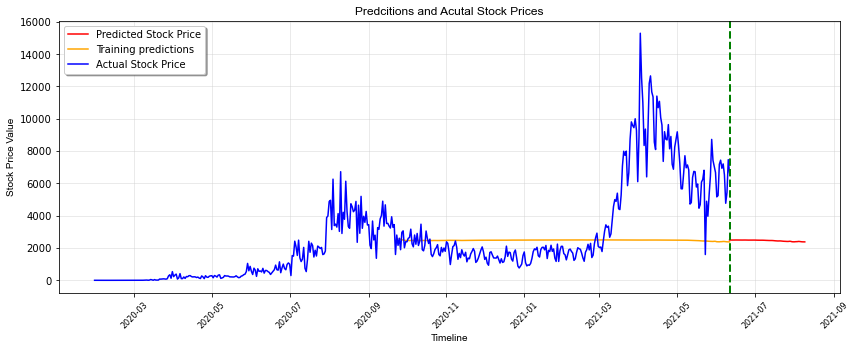

In [16]:
# Set plot size 
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5

# Plot parameters
START_DATE_FOR_PLOTTING = n_starting_date
, PREDICTIONS_FUTURE[predict_value]
plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE[predict_value], color='r', label='Predicted Stock Price')
plt.plot(PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:].index, PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:][predict_value], color='orange', label='Training predictions')
plt.plot(dataset_train.loc[START_DATE_FOR_PLOTTING:].index, dataset_train.loc[START_DATE_FOR_PLOTTING:][predict_value], color='b', label='Actual Stock Price')

plt.axvline(x = min(PREDICTIONS_FUTURE.index), color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title('Predcitions and Acutal Stock Prices', family='Arial', fontsize=12)
plt.xlabel('Timeline', family='Arial', fontsize=10)
plt.ylabel('Stock Price Value', family='Arial', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

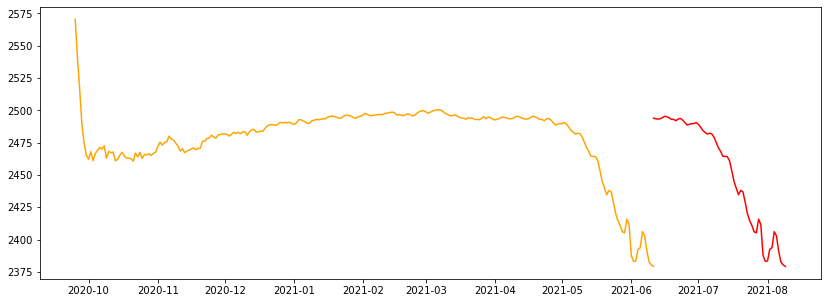

In [17]:
plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE[predict_value], color='r', label='Predicted Stock Price')
plt.plot(PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:].index, PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:][predict_value], color='orange', label='Training predictions')
# plt.plot(dataset_train.loc[START_DATE_FOR_PLOTTING:].index, dataset_train.loc[START_DATE_FOR_PLOTTING:]['new_cases'], color='b', label='Actual Stock Price')
plt.show()